In [1]:
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import random
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
filenames = pickle.load(open('static/feature/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('static/feature/features-vgg16-resnet.pickle', 'rb'))

In [ ]:
neighbors = NearestNeighbors(n_neighbors=len(feature_list),
                             algorithm='brute',
                             metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors(feature_list)

# Calculating some stats
print("Median distance between all photos: ", np.median(distances))
print("Max distance between all photos: ", np.max(distances))
print("Median distance among most similar photos: ", np.median(distances[:, 2]))

In [7]:
selected_features = feature_list[:]
selected_filenames = filenames[:]

In [8]:
from sklearn.manifold import TSNE

# You can play with these values and see how the results change
n_components = 2
verbose = 1
perplexity = 30
n_iter = 1000

time_start = time.time()
tsne_results = TSNE(n_components=n_components,
                    verbose=verbose,
                    perplexity=perplexity,
                    n_iter=n_iter,
                    metric='euclidean').fit_transform(selected_features)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

C:\Users\hoang.nguyennhat\Anaconda3\envs\scientificProject\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\hoang.nguyennhat\Anaconda3\envs\scientificProject\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8677 samples in 0.739s...
[t-SNE] Computed neighbors for 8677 samples in 82.672s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8677
[t-SNE] Computed conditional probabilities for sample 2000 / 8677
[t-SNE] Computed conditional probabilities for sample 3000 / 8677
[t-SNE] Computed conditional probabilities for sample 4000 / 8677
[t-SNE] Computed conditional probabilities for sample 5000 / 8677
[t-SNE] Computed conditional probabilities for sample 6000 / 8677
[t-SNE] Computed conditional probabilities for sample 7000 / 8677
[t-SNE] Computed conditional probabilities for sample 8000 / 8677
[t-SNE] Computed conditional probabilities for sample 8677 / 8677
[t-SNE] Mean sigma: 0.255548
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.419617
[t-SNE] KL divergence after 1000 iterations: 1.238159
t-SNE done! Time elapsed: 113.86494874954224 seconds


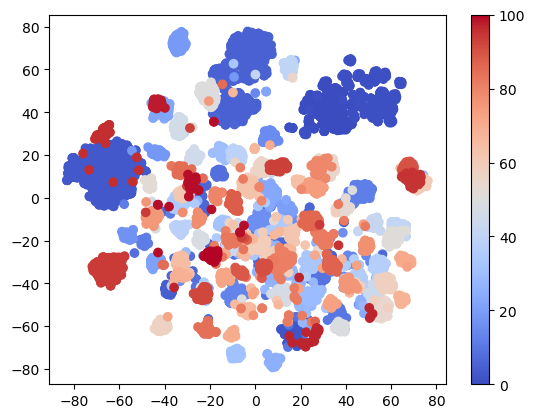

In [9]:
color_map = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:, 0],
                           tsne_results[:, 1],
                           c=selected_class_ids,
                           cmap=color_map)
plt.colorbar(scatter_plot)
plt.show()

In [11]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    if axis is None:
        axis = plt.gca()
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        image.thumbnail((100, 100), Image.ANTIALIAS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0),
                                  xycoords='data',
                                  frameon=False)
        axis.add_artist(anno_box)
    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()


def show_tsne(x, y, selected_filenames):
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x, y, selected_filenames, zoom=0.3, axis=axis)
    plt.show()

C:\Users\hoang.nguyennhat\AppData\Local\Temp\ipykernel_9160\2384389133.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image.thumbnail((100, 100), Image.ANTIALIAS)


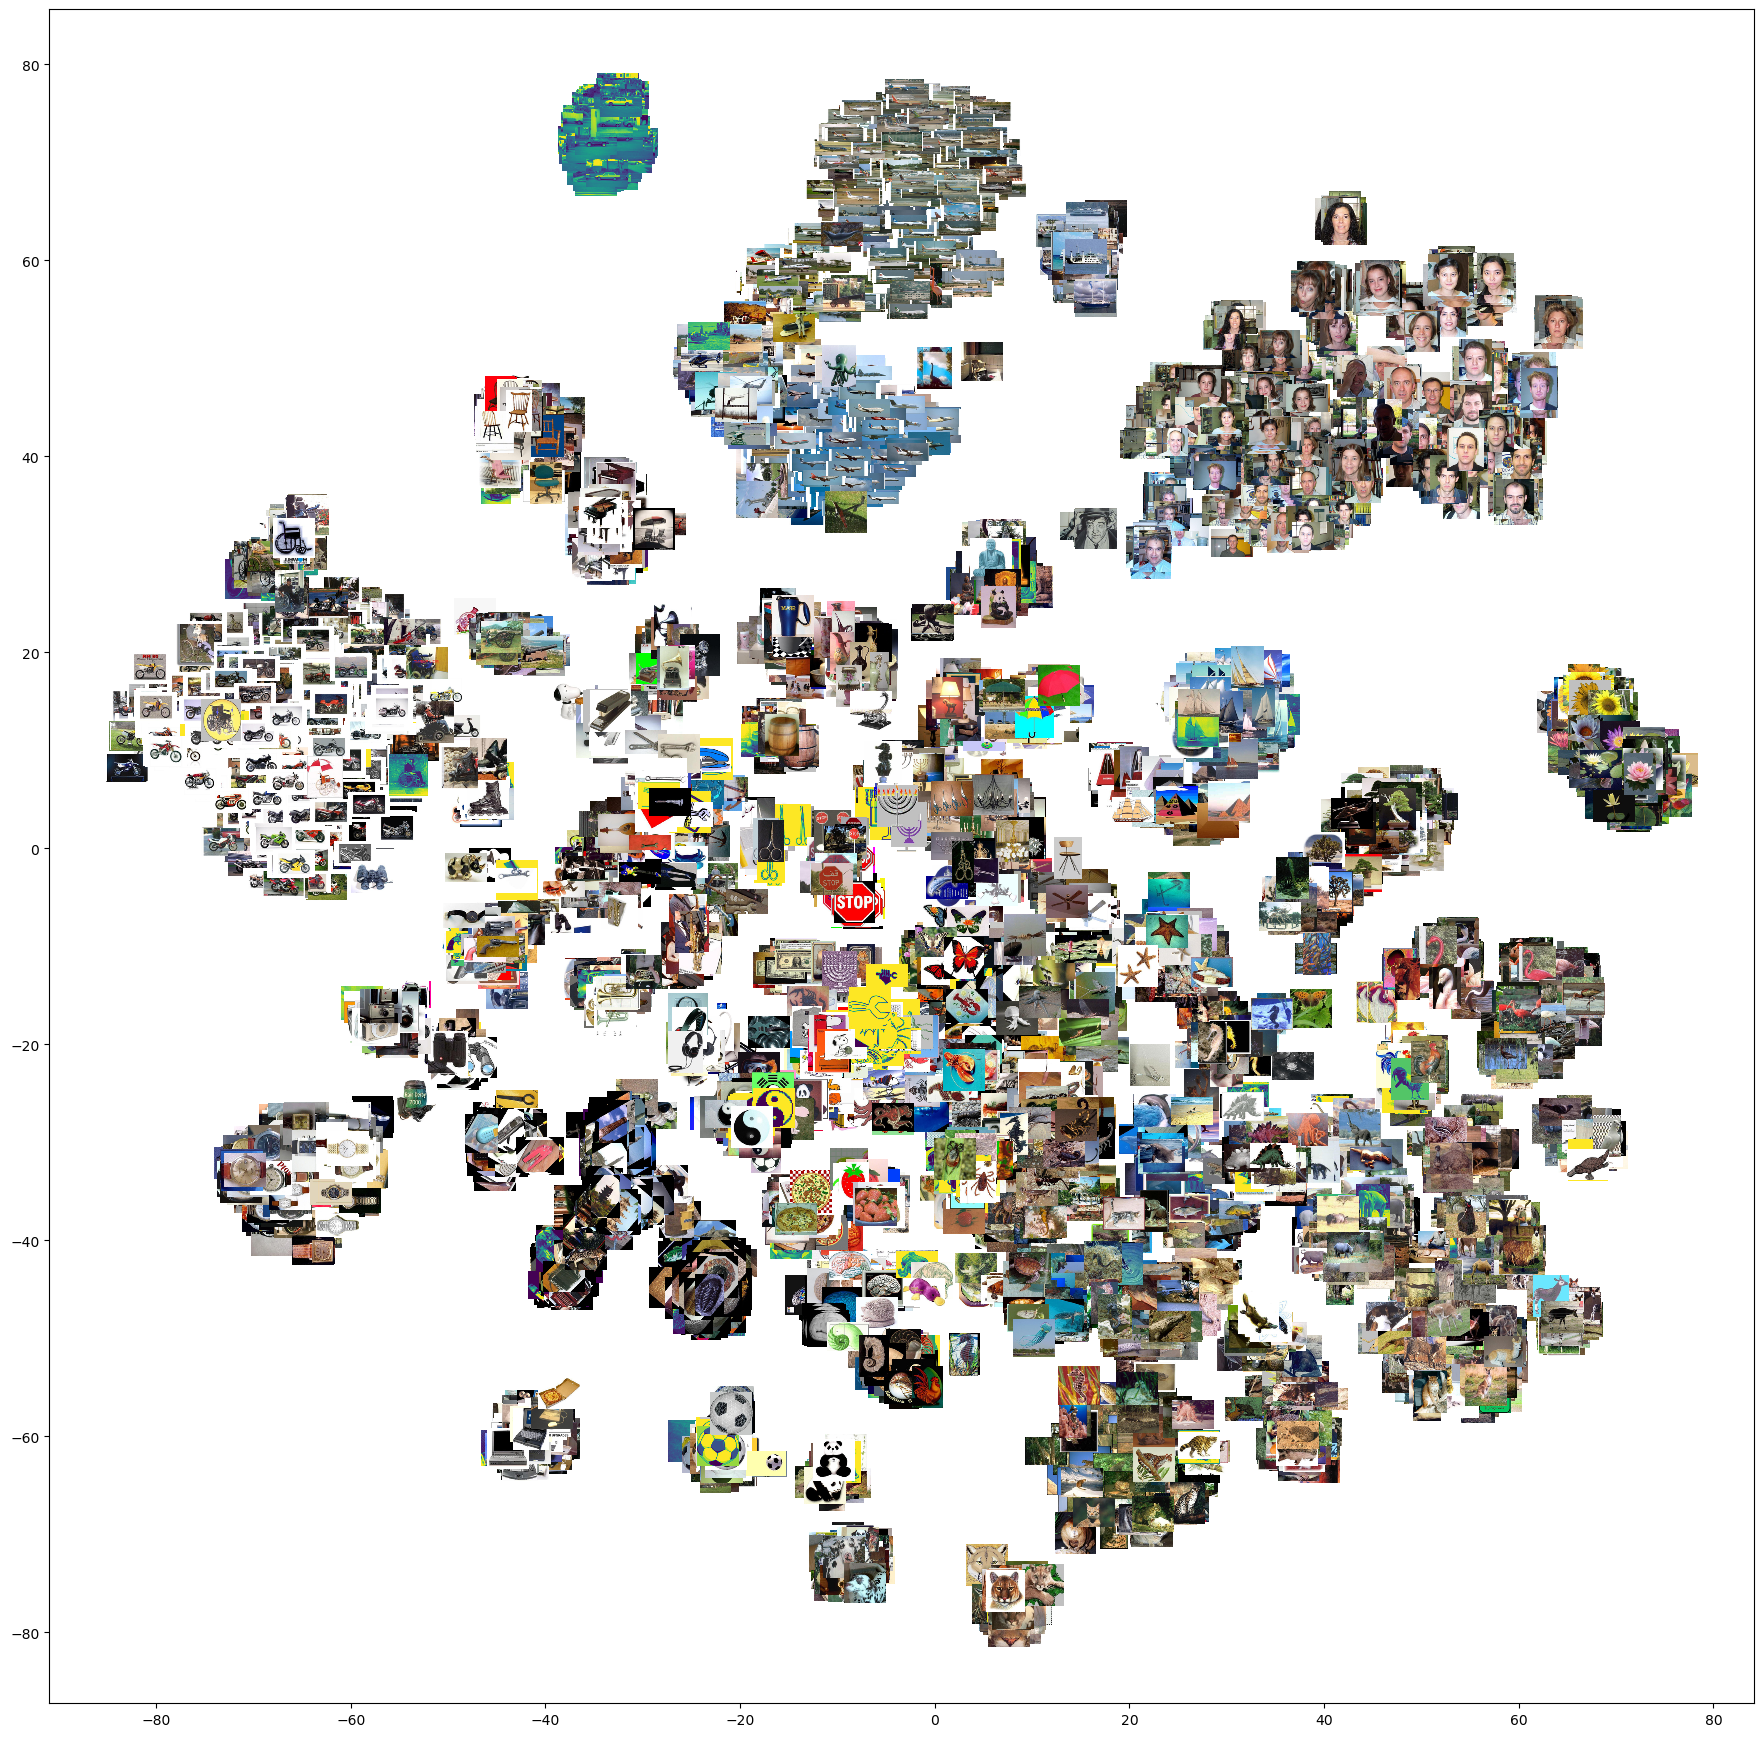

In [12]:
show_tsne(tsne_results[:, 0], tsne_results[:, 1], selected_filenames)